<a href="https://colab.research.google.com/github/okanbuyuktepe/ML-Days/blob/master/ML_Days_W1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [0]:
from google.colab import files
uploaded = files.upload()

Saving datasets_228_482_diabetes.csv to datasets_228_482_diabetes (1).csv


In [0]:
import io
df= pd.read_csv(io.BytesIO(uploaded['datasets_228_482_diabetes.csv']))

In [0]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [0]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [0]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [0]:
# Create a new column
df['Overweight'] = [1 if x > 25 else 0 for x in df.BMI] # BMI = body mass index
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Overweight
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1


In [0]:
plt.rcParams.update({'font.size' : 25})

In [0]:
sns.set_context('paper')  # A dictionary of parameters or the name of a preconfigured set.
#sns.set_context("paper") # paper,poster, talk

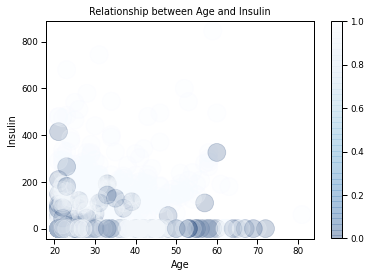

In [0]:
# Scatter Plot
plt.scatter(df.Age, df.Insulin, c=df.Overweight, s=320, alpha=0.2, cmap='Blues_r')
# c = color, s = markersize, alpha= The alpha blending value, between 0 (transparent) and 1 (opaque), cmap = colormap
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Insulin')
plt.title('Relationship between Age and Insulin')
plt.show()

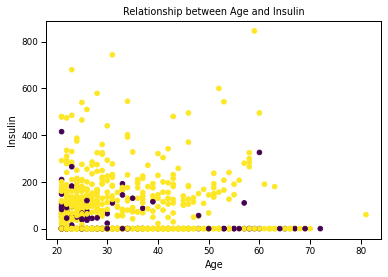

In [0]:
# Scatter plots with subplots
fig, ax = plt.subplots()
ax.scatter(df.Age, df.Insulin, c=df.Overweight, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Insulin')
ax.set_title('Relationship between Age and Insulin')
plt.show()

In a histogram, the total range of data set (i.e from minimum value to maximum value) is divided into 8 to 15 equal parts. These equal parts are known as bins or class intervals.

Each and every observation (or value) in the data set is placed in the appropriate bin. The number of observations occupying a given bin, becomes the frequency of that bin.

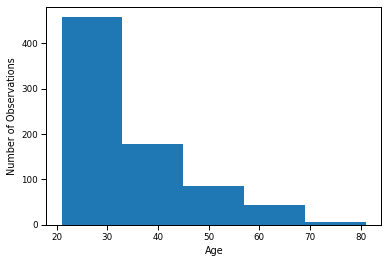

In [0]:
fig, ax = plt.subplots()
ax.hist(df.Age, label="Age", bins=5)
ax.set_xlabel('Age')
ax.set_ylabel('Number of Observations')
plt.show()

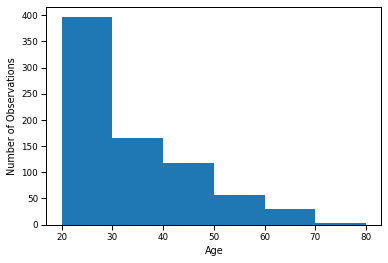

In [0]:
bins = [20, 30, 40, 50, 60, 70, 80]
fig, ax = plt.subplots()
ax.hist(df.Age, label='Age Bins', bins=bins, )
ax.set_xlabel('Age')
ax.set_ylabel('Number of Observations')
plt.show()

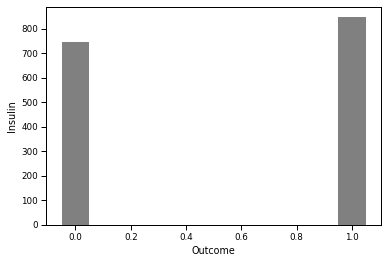

In [0]:
# Bar Plot
fig, ax = plt.subplots()
ax.bar(df.Outcome, df.Insulin, color='grey', width=0.1)
ax.set_xlabel('Outcome')
ax.set_ylabel('Insulin')
plt.show()

Save the Figure

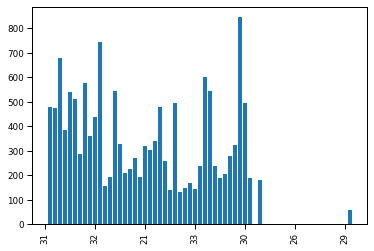

In [0]:
fig, ax = plt.subplots()
ax.bar(df.Age, df.Insulin)
ax.set_xticklabels(df.Age, rotation=90)
fig.savefig('Age.png')


*   fig.savefig(“Age.png”): kayıp olmadan kaydeder, yüksek kalitelidir ama çok hafıza tutar
*   fig.savefig(“Age.jpg”, quality=50): websitesine konulabilir
*   fig.savefig(“Age.png”, dpi=200): dots per inch, dense rendering
*   fig.set_size_inches([5,3]): aspect ratio

### Seaborn

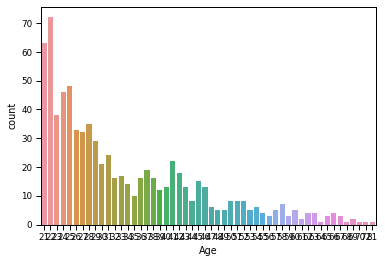

In [0]:
# Count Plot
sns.set_palette('BrBG')
sns.countplot(x = 'Age', data=df)
plt.show()

aspect ratio  : görselin genişliğinin yüksekliğine oranı

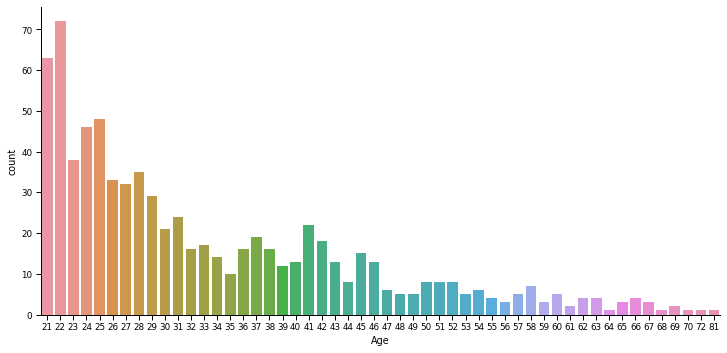

In [0]:
sns.catplot(x = 'Age', aspect=2 , data=df, kind='count', )
plt.show()

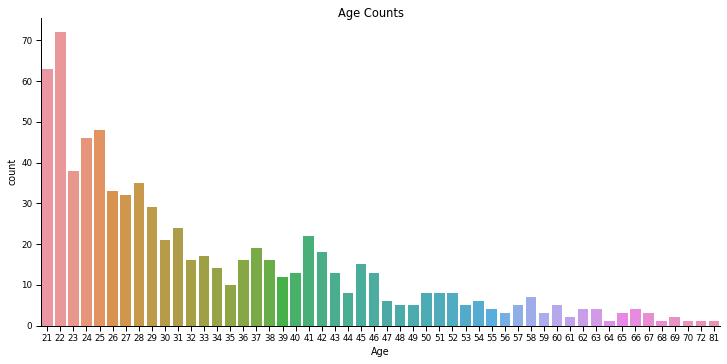

In [0]:
sns.catplot(x = 'Age', data=df, aspect = 2, kind='count').fig.suptitle('Age Counts', y = 1, x = 0.5)
plt.show()

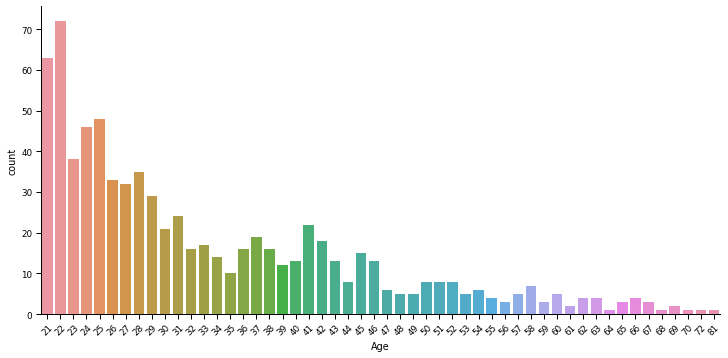

In [0]:
sns.catplot(x= 'Age', data=df, aspect = 2, kind='count')
plt.xticks(rotation=45)
plt.show()

    hue : Grouping variable that will produce points with different colors.  

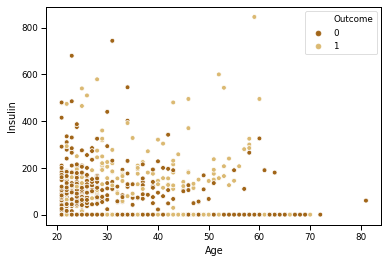

In [0]:
# Scatter Plot
sns.scatterplot(x = 'Age', y = 'Insulin', data=df, hue="Outcome")
plt.show()

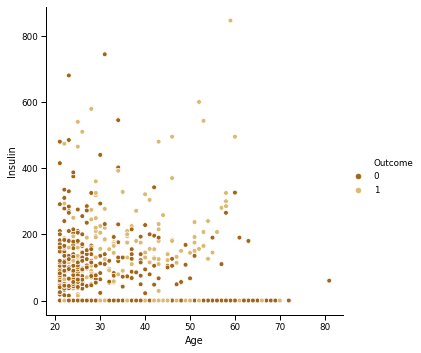

In [0]:
sns.relplot(x = 'Age', y = 'Insulin', data =df, hue= 'Outcome', kind='scatter')
plt.show()

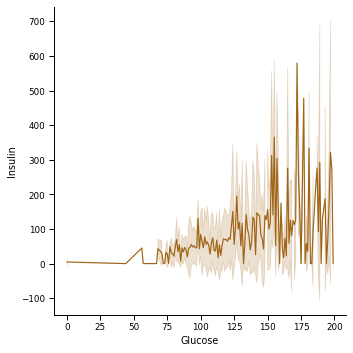

In [0]:
# Line Plot
sns.relplot(x = 'Glucose', y = 'Insulin', data=df, kind='line', ci = 'sd', markers=True, dashes=False)
plt.show()

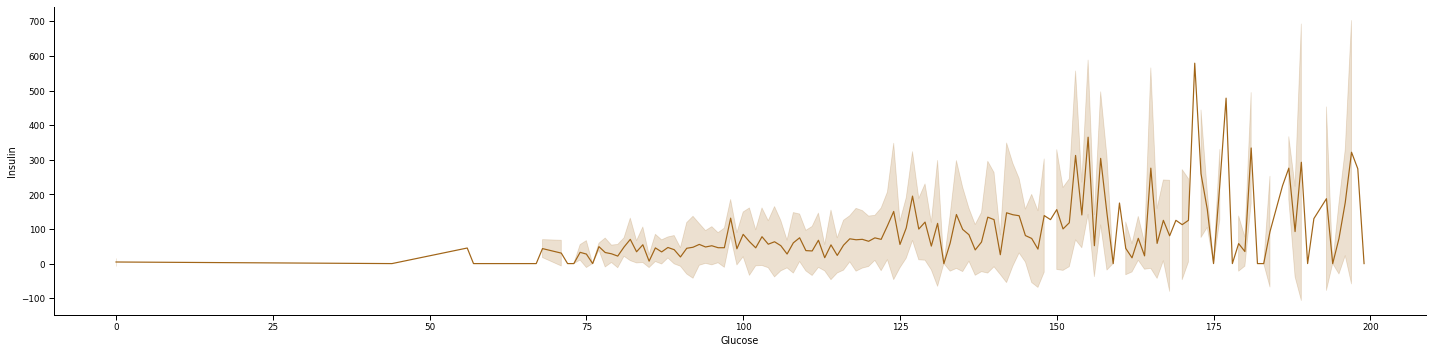

In [0]:
sns.relplot(x = 'Glucose', y = 'Insulin', data=df, kind = 'line', ci='sd', aspect=4)
plt.show()

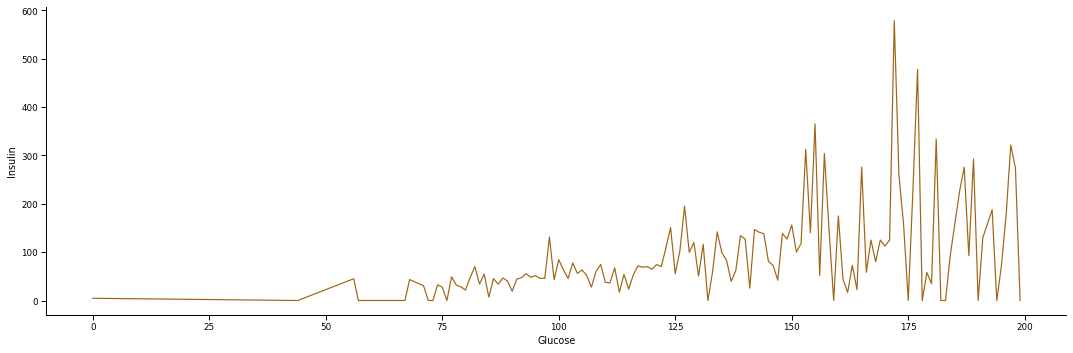

In [0]:
sns.relplot(x = 'Glucose', y = 'Insulin', data = df, kind = 'line', aspect = 3, ci=None)
plt.show()

Scatter Subplots

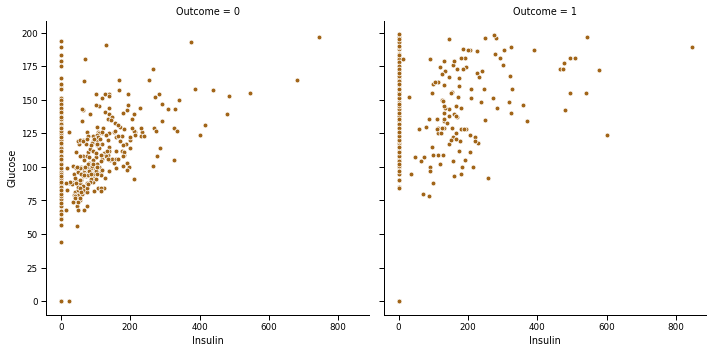

In [0]:
sns.relplot(x = 'Insulin', y = 'Glucose', data=df, kind='scatter', col='Outcome', ) # col : Categorical variables that will determine the faceting of the grid.
plt.show()

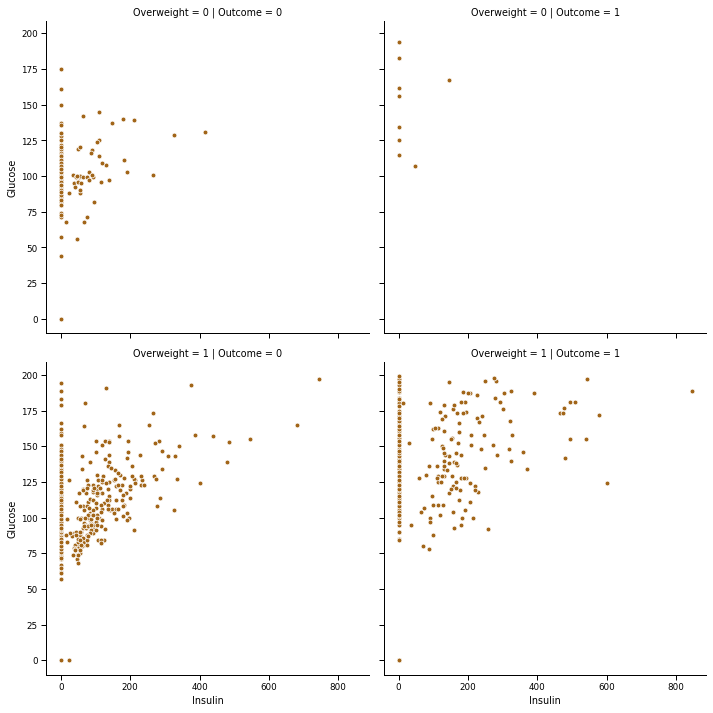

In [0]:
sns.relplot(x = 'Insulin', y = 'Glucose', data=df, kind='scatter', col='Outcome', row='Overweight')
plt.show()

#### HeatMap

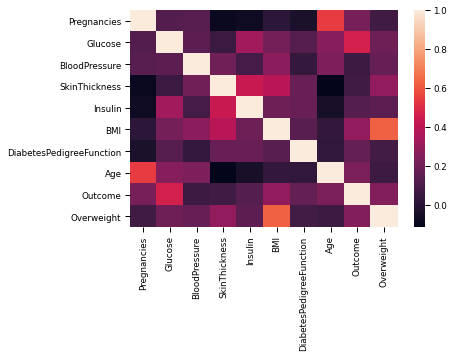

In [0]:
sns.set_palette('cividis')
correlation = df.corr()
sns.heatmap(correlation)

#### Categorical Plots

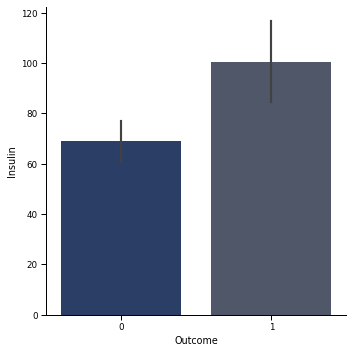

In [0]:
sns.catplot(x = 'Outcome', y = 'Insulin', data=df, kind='bar')
plt.show()

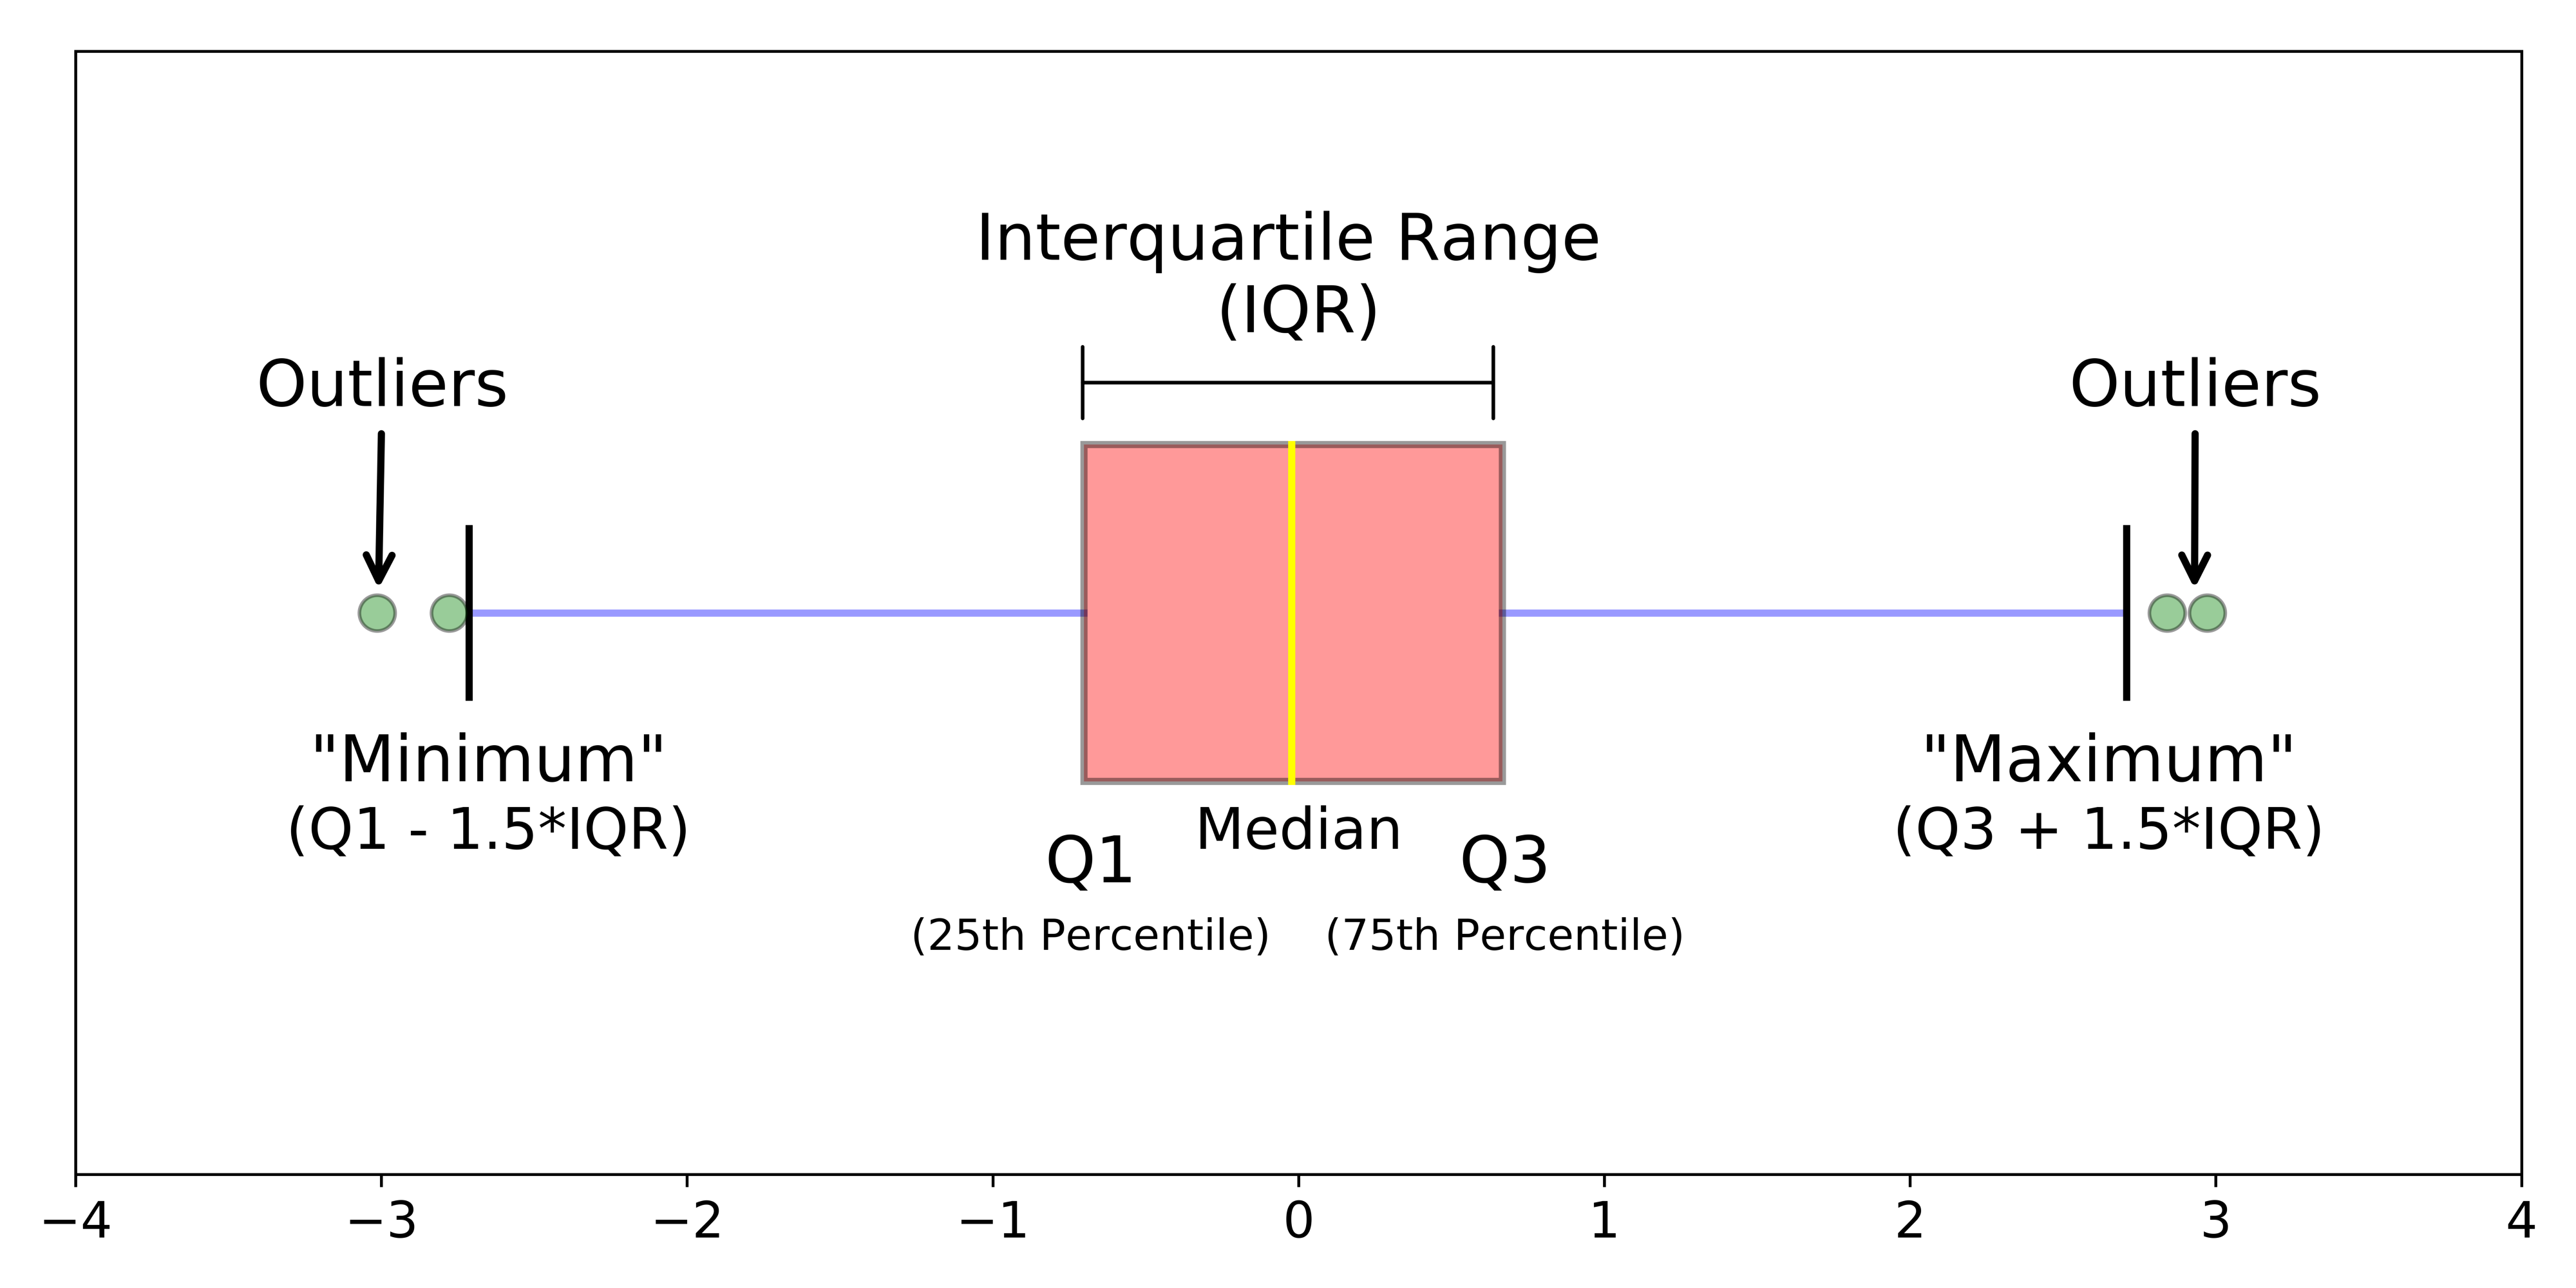

In [94]:
from IPython.display import Image
Image('1_2c21SkzJMf3frPXPAR_gZA.png', width=800, height=300)

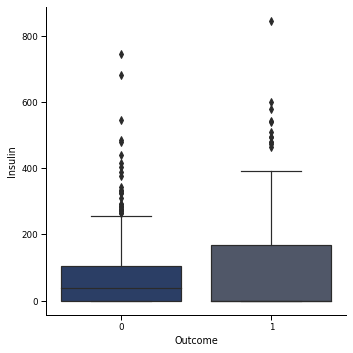

In [95]:
sns.catplot(x= 'Outcome', y = 'Insulin', kind='box', data=df)
plt.show()

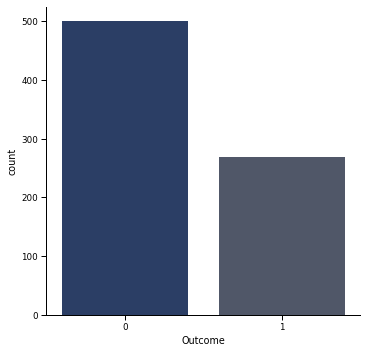

In [96]:
sns.catplot(x = 'Outcome', data=df, kind='count')
plt.show()

Presets

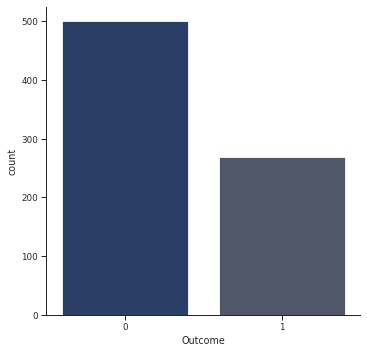

In [99]:
sns.set_style('ticks') # white, dark, whitegrid, darkgrid, ticks
sns.catplot(x = 'Outcome', data=df, kind='count')
plt.show()

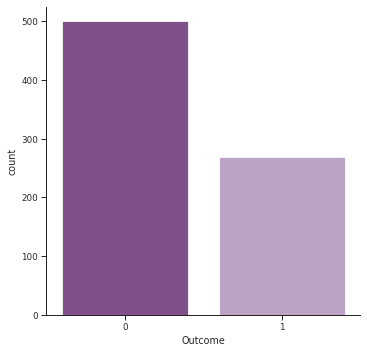

In [100]:
sns.set_palette('PRGn')
sns.catplot(x = 'Outcome', data=df, kind='count')
plt.show()
# categorical plotlarda “RdBu”, “PRGn”,”RdBu_r”,”PRGn_r”
# continuous plotlarda Greys, Blues, PuRd, GnBu
